<a href="https://colab.research.google.com/github/RHaykal/StockPrice_Prediction/blob/main/SKRIPSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediksi Data ARTO

##Import Library Dan Data Cleaning

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/ARTO-3.csv")
data

,timestamp,open,low,high,close,volume
0,2020-01-01,2900,2900,3450,3100,0
1,2020-01-02,3200,3030,3300,3100,96700
2,2020-01-03,3100,3100,3200,3100,34300
3,2020-01-06,3100,2800,3100,2850,165200
4,2020-01-07,2850,2850,2850,2850,18600
...,...,...,...,...,...,...
780,2022-12-28,3600,3510,3600,3520,7254800
781,2022-12-29,3520,3400,3550,3510,9680100
782,2022-12-30,3540,3480,3850,3720,30668500
783,2023-01-02,3750,3610,3850,3630,6302800


In [ ]:
#data.mean()
#data.min()
#data.max()
#data.std()
data.var()

<ipython-input-3-8b85a4b81caf>:5: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.var()


open      3.019700e+07
low       2.855970e+07
high      3.154222e+07
close     3.008001e+07
volume    3.615238e+14
dtype: float64

In [ ]:
del data['volume']
del data['timestamp']
data

,open,low,high,close
0,2900,2900,3450,3100
1,3200,3030,3300,3100
2,3100,3100,3200,3100
3,3100,2800,3100,2850
4,2850,2850,2850,2850
...,...,...,...,...
780,3600,3510,3600,3520
781,3520,3400,3550,3510
782,3540,3480,3850,3720
783,3750,3610,3850,3630


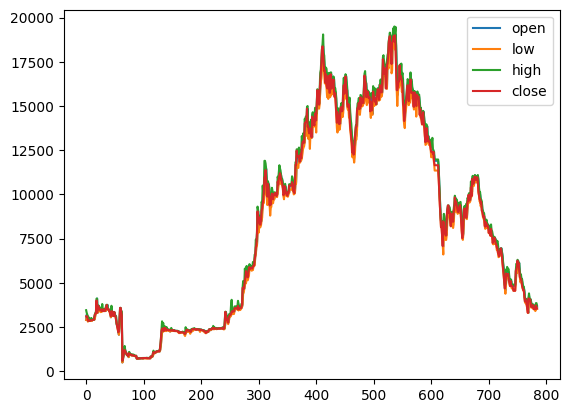

In [ ]:
import matplotlib.pyplot as plt
plt.plot(data)
plt.legend(['open', 'low', 'high', 'close'])
#plt.xlim([400,500])
plt.show()

##Process Automasi Untuk Mengisi Data Target

In [ ]:
# Di bawah ini merupakan iterasi untuk memasukan data close ke dalam list
close = []
close_fix = []

for x in data.index:
  close.append(data['close'][x])
print(close)

[3100, 3100, 3100, 2850, 2850, 2850, 2870, 2850, 2870, 2880, 2890, 2900, 2900, 2900, 2950, 3190, 3250, 3290, 4000, 3310, 3460, 3700, 3590, 3500, 3500, 3450, 3450, 3400, 3500, 3500, 3400, 3450, 3410, 3410, 3580, 3650, 3750, 3500, 3500, 3500, 3400, 3400, 3200, 3110, 3200, 3400, 3250, 3120, 3120, 3350, 3150, 3100, 2900, 2700, 2520, 2360, 2200, 2300, 2870, 3580, 3580, 3370, 3140, 590, 735, 915, 1140, 1200, 1120, 1045, 975, 910, 910, 850, 1020, 960, 940, 955, 940, 900, 885, 905, 905, 875, 860, 850, 870, 870, 721, 704, 721, 721, 721, 721, 725, 729, 729, 733, 746, 742, 742, 742, 742, 742, 746, 746, 746, 725, 725, 729, 729, 729, 829, 812, 825, 841, 982, 1078, 1044, 1044, 1040, 1082, 1119, 1115, 1123, 1123, 1132, 1115, 1181, 1467, 1832, 2288, 2405, 2405, 2405, 2264, 2446, 2454, 2421, 2313, 2371, 2355, 2313, 2322, 2322, 2322, 2305, 2305, 2322, 2305, 2297, 2322, 2322, 2272, 2280, 2280, 2280, 2272, 2272, 2255, 2255, 2197, 2172, 2172, 2214, 2197, 2197, 2197, 2197, 2189, 2164, 2114, 2114, 2181, 2313

In [ ]:
#Code di bawah merupakan code untuk mendapatkan field close+1,+2, dan +3 yang
#akan dijadikan sebagai data target

#Logika proses di bawah yaitu melakukan iterasi 3 kali dimana setiap iterasi nya akan
#tidak mengikutsertakan ke 3 data awal secara bergantian sesuai nama list masing masing.
#contohnya list close+1 dengan tidak mengikutsertakan data pada indeks 0 dan seterusnya
#sampai dengan data close+3

close_fix = close
close_1 = []
close_2 = []
close_3 = []
for x in range(3):
  if x == 0:
    close = close_fix
    del close[0]
    close_1.extend(close)
  if x == 1:
    close = close_fix
    for x in range(1):
      del close[0]
    close_2.extend(close)
  if x == 2:
    close = close_fix
    for x in range(2):
      del close[0]
      break
    close_3.extend(close)
print(close_1, '\n', close_2, '\n', close_3)

[3100, 3100, 2850, 2850, 2850, 2870, 2850, 2870, 2880, 2890, 2900, 2900, 2900, 2950, 3190, 3250, 3290, 4000, 3310, 3460, 3700, 3590, 3500, 3500, 3450, 3450, 3400, 3500, 3500, 3400, 3450, 3410, 3410, 3580, 3650, 3750, 3500, 3500, 3500, 3400, 3400, 3200, 3110, 3200, 3400, 3250, 3120, 3120, 3350, 3150, 3100, 2900, 2700, 2520, 2360, 2200, 2300, 2870, 3580, 3580, 3370, 3140, 590, 735, 915, 1140, 1200, 1120, 1045, 975, 910, 910, 850, 1020, 960, 940, 955, 940, 900, 885, 905, 905, 875, 860, 850, 870, 870, 721, 704, 721, 721, 721, 721, 725, 729, 729, 733, 746, 742, 742, 742, 742, 742, 746, 746, 746, 725, 725, 729, 729, 729, 829, 812, 825, 841, 982, 1078, 1044, 1044, 1040, 1082, 1119, 1115, 1123, 1123, 1132, 1115, 1181, 1467, 1832, 2288, 2405, 2405, 2405, 2264, 2446, 2454, 2421, 2313, 2371, 2355, 2313, 2322, 2322, 2322, 2305, 2305, 2322, 2305, 2297, 2322, 2322, 2272, 2280, 2280, 2280, 2272, 2272, 2255, 2255, 2197, 2172, 2172, 2214, 2197, 2197, 2197, 2197, 2189, 2164, 2114, 2114, 2181, 2313, 2288

In [ ]:
#Proses dibawah ini berfungsi untuk menambahkan data yang kosong dari hasil notebook
#di atas sehinigga data field close+1,+2, dan +3 memiliki jumlah kolom yang sama dengan
#data close

close_1.extend([3510])
close_2.extend([3510, 3270])
close_3.extend([3510, 3270, 3060])
print(close_1, '\n', close_2, '\n', close_3)

[3100, 3100, 2850, 2850, 2850, 2870, 2850, 2870, 2880, 2890, 2900, 2900, 2900, 2950, 3190, 3250, 3290, 4000, 3310, 3460, 3700, 3590, 3500, 3500, 3450, 3450, 3400, 3500, 3500, 3400, 3450, 3410, 3410, 3580, 3650, 3750, 3500, 3500, 3500, 3400, 3400, 3200, 3110, 3200, 3400, 3250, 3120, 3120, 3350, 3150, 3100, 2900, 2700, 2520, 2360, 2200, 2300, 2870, 3580, 3580, 3370, 3140, 590, 735, 915, 1140, 1200, 1120, 1045, 975, 910, 910, 850, 1020, 960, 940, 955, 940, 900, 885, 905, 905, 875, 860, 850, 870, 870, 721, 704, 721, 721, 721, 721, 725, 729, 729, 733, 746, 742, 742, 742, 742, 742, 746, 746, 746, 725, 725, 729, 729, 729, 829, 812, 825, 841, 982, 1078, 1044, 1044, 1040, 1082, 1119, 1115, 1123, 1123, 1132, 1115, 1181, 1467, 1832, 2288, 2405, 2405, 2405, 2264, 2446, 2454, 2421, 2313, 2371, 2355, 2313, 2322, 2322, 2322, 2305, 2305, 2322, 2305, 2297, 2322, 2322, 2272, 2280, 2280, 2280, 2272, 2272, 2255, 2255, 2197, 2172, 2172, 2214, 2197, 2197, 2197, 2197, 2189, 2164, 2114, 2114, 2181, 2313, 2288

In [ ]:
#Code di bawah berfungsi untuk menyatukan list close_1,_2,dan_3 menjadi sebuah dictionary
data_target = {
    'close+1': close_1,
    'close+2': close_2,
    'close+3': close_3,
}

In [ ]:
#Dictionary tadi akan dibuat kedalam format pandas DataFrame dengan nama target
target = pd.DataFrame(data_target)
target

,close+1,close+2,close+3
0,3100,3100,2850
1,3100,2850,2850
2,2850,2850,2850
3,2850,2850,2870
4,2850,2870,2850
...,...,...,...
780,3510,3720,3630
781,3720,3630,3540
782,3630,3540,3510
783,3540,3510,3270


## Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2)
x_train

,open,low,high,close
217,2322,2322,2380,2363
447,14800,14625,16100,15850
495,14700,14325,15500,15200
228,2405,2396,2405,2396
408,16350,16350,17050,16825
...,...,...,...,...
123,1127,1078,1127,1115
508,16000,15550,16000,15775
635,8300,8200,9000,8525
296,7173,6987,7318,7132


##Normalisasi Data

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
# stdy = StandardScaler()

std.fit(x_train)
X_train = std.transform(x_train)
std.fit(x_test)
X_test = std.transform(x_test)
std.fit(y_train)
Y_train = std.transform(y_train)
std.fit(y_test)
Y_test = std.transform(y_test)

# X_train = stdx.fit_transform(x_train)
# X_test = stdx.fit_transform(x_test)
# Y_train = stdy.fit_transform(y_train)
# Y_test = stdy.fit_transform(y_test)

##Pembuatan Model MultiOutput SVR

In [ ]:
from sklearn.svm import SVR
svr = SVR()
#untuk menggunakan kernel, syntax sbb: svr=SVR(kernel='poly/rbf/sigmoid')
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
mor = MultiOutputRegressor(svr)
moknn = MultiOutputRegressor(knn)

In [ ]:
mor = mor.fit(X_train, Y_train)
moknn = moknn.fit(X_train, Y_train)

##Melakukan Prediksi

In [ ]:
y_pred = mor.predict(X_test)
knn_pred = moknn.predict(X_test)
# print(y_pred)

In [ ]:
prediction = [[2370,	2440,	2350,	2380]]
price_pred = mor.predict(prediction)
print("SVR Prediction: ", price_pred)
knn_price_pred = moknn.predict(prediction)
print("\nKNN Prediction: ", knn_price_pred)

SVR Prediction:  [[0.26195682 0.19920087 0.18141071]]

KNN Prediction:  [[1.87287455 1.77425111 1.66543651]]


In [ ]:
mse_point1 = []
mse_point2 = []
mse_point3 = []
mae_point1 = []
mae_point2 = []
mae_point3 = []
temp = 0
temp1 = 0
j = 0
for i in y_pred[:,0]:
  temp = (Y_test[j,0]-y_pred[j,0])**2
  temp1 = abs(Y_test[j,0]-y_pred[j,0])
  mse_point1.append(temp)
  mae_point1.append(temp1)
  temp=0
  temp1=0
  temp = (Y_test[j,1]-y_pred[j,1])**2
  temp1 = abs(Y_test[j,1]-y_pred[j,1])
  mse_point2.append(temp)
  mae_point2.append(temp1)
  temp = 0
  temp1=0
  temp = (Y_test[j,2]-y_pred[j,2])**2
  temp1 = abs(Y_test[j,2]-y_pred[j,2])
  mse_point3.append(temp)
  mae_point3.append(temp1)
  j += 1
print(mse_point1)
print(mse_point2)
print(mse_point3)
print(mae_point1)
print(mae_point2)
print(mae_point3)

[0.00019590634074284795, 0.0010633695051016838, 3.3959467699605143e-06, 0.0030928254098902086, 0.003314259562952168, 0.0008035910116178342, 0.0012328189811744838, 0.0055069443742403615, 0.026026959054866787, 0.002848347276171893, 0.0030107599753415185, 0.003521988384053719, 5.019601847445353e-05, 0.0007231332786453204, 0.00044516259857743515, 0.0010790754514767766, 0.004532920528681866, 0.0009891898338495288, 0.001317062401567684, 0.0010756013631967097, 0.005309558965976296, 0.0013599824768790532, 0.07585632885886691, 0.010284589130197835, 0.0009662181645568109, 0.0023630207398907467, 0.001349449137356317, 2.648268194669043e-05, 0.019517320511577774, 2.1235774365825463e-05, 0.0009022370362581439, 0.0007629143370110941, 0.0009137650634212657, 0.0014429822849231463, 0.0008035910116178342, 0.002030964656430828, 0.00910490592667596, 0.0011431662192355099, 0.003778371105913206, 2.057134955953507e-05, 4.253781430418856e-06, 0.0026409824032233545, 0.0017680254972052736, 0.00097621762406942, 0

##Menampilkan MSE, RMSE, dan MAE

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_one = mean_squared_error(Y_test[:,0], y_pred[:,0])
mse_two = mean_squared_error(Y_test[:,1], y_pred[:,1])
mse_three = mean_squared_error(Y_test[:,2], y_pred[:,2])
print(f'SVM MSE for first regressor: {mse_one} - second regressor: {mse_two} - third regressor: {mse_three}')

#print(f'RMSE for first regressor: {(mse_one**0.5)} - second regressor: {(mse_two**0.5)} - third regressor: {(mse_three**0.5)}')

mae_one = mean_absolute_error(Y_test[:,0], y_pred[:,0])
mae_two = mean_absolute_error(Y_test[:,1], y_pred[:,1])
mae_three = mean_absolute_error(Y_test[:,2], y_pred[:,2])
print(f'SVM MAE for first regressor: {mae_one} - second regressor: {mae_two} - third regressor: {mae_three}\n')

knn_mse_one = mean_squared_error(Y_test[:,0], knn_pred[:,0])
knn_mse_two = mean_squared_error(Y_test[:,1], knn_pred[:,1])
knn_mse_three = mean_squared_error(Y_test[:,2], knn_pred[:,2])
print(f'KNN MSE for first regressor: {knn_mse_one} - second regressor: {knn_mse_two} - third regressor: {knn_mse_three}')

#print(f'KNN RMSE for first regressor: {(knn_mse_one**0.5)} - second regressor: {(knn_mse_two**0.5)} - third regressor: {(knn_mse_three**0.5)}')

knn_mae_one = mean_absolute_error(Y_test[:,0], knn_pred[:,0])
knn_mae_two = mean_absolute_error(Y_test[:,1], knn_pred[:,1])
knn_mae_three = mean_absolute_error(Y_test[:,2], knn_pred[:,2])
print(f'KNN MAE for first regressor: {knn_mae_one} - second regressor: {knn_mae_two} - third regressor: {knn_mae_three}')

SVM MSE for first regressor: 0.007369647050949627 - second regressor: 0.012870057043254689 - third regressor: 0.018295748194475193
SVM MAE for first regressor: 0.0593128806380237 - second regressor: 0.07775575203250874 - third regressor: 0.09305801597620261

KNN MSE for first regressor: 0.007885412903749117 - second regressor: 0.013718265851673734 - third regressor: 0.02385544063840321
KNN MAE for first regressor: 0.056404387604877156 - second regressor: 0.07954756749707159 - third regressor: 0.1108604442037042


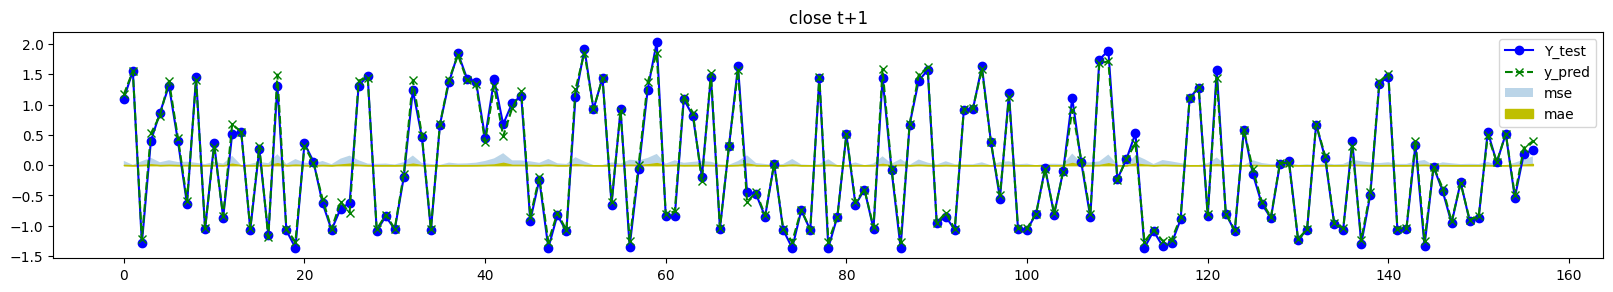

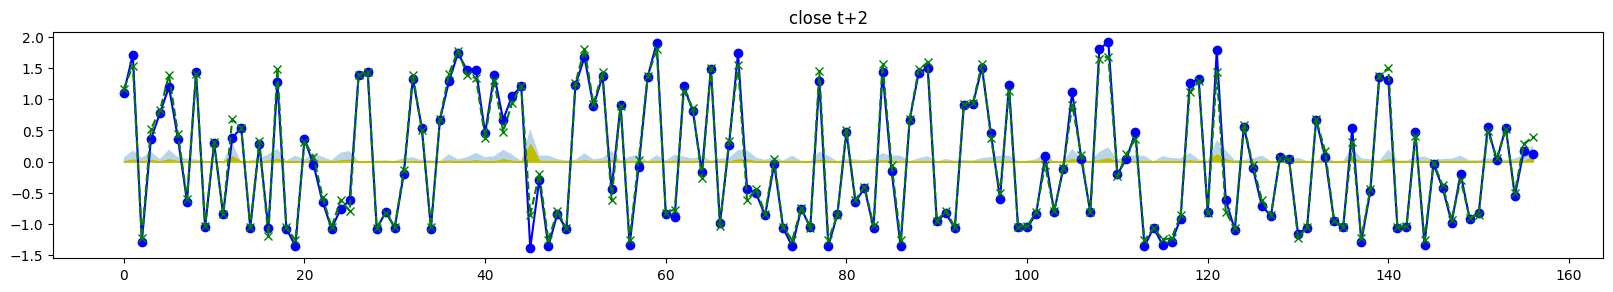

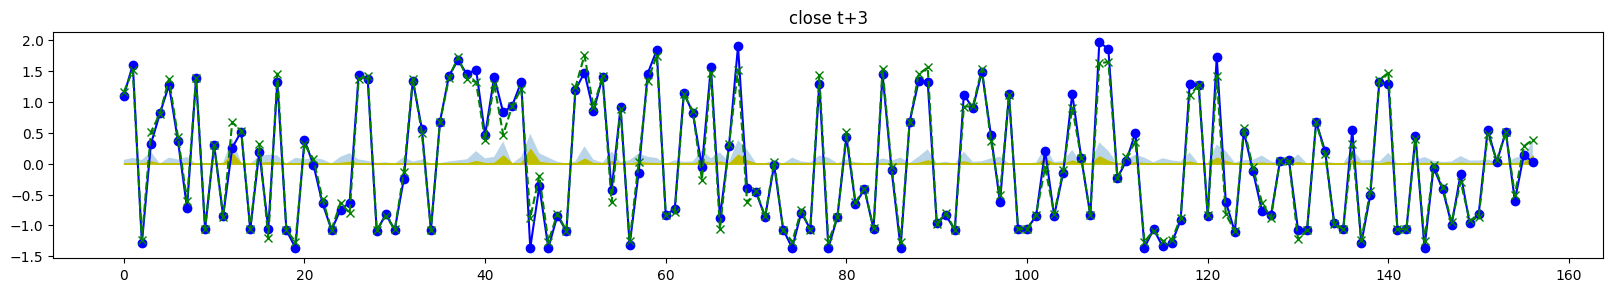

In [ ]:
import numpy as np
xplot = np.arange(0,157)
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.subplot(3, 1, 1)
plt.plot(Y_test[:,0], marker='o', color='b')
plt.plot(y_pred[:,0], marker='x', linestyle='--', color='g')
plt.stackplot(xplot, mae_point1, alpha=0.3)
plt.stackplot(xplot, mse_point1, color='y')
plt.title('close t+1')
plt.legend(["Y_test", "y_pred", "mse", "mae"])

plt.figure(figsize=(20, 10))
plt.subplot(3, 1, 2)
plt.plot(Y_test[:,1], marker='o', color='b')
plt.plot(y_pred[:,1], marker='x', linestyle='--', color='g')
plt.stackplot(xplot, mae_point2, alpha=0.3)
plt.stackplot(xplot, mse_point2, color='y')
plt.title('close t+2')

plt.figure(figsize=(20, 10))
plt.subplot(3, 1, 3)
plt.plot(Y_test[:,2], marker='o', color='b')
plt.plot(y_pred[:,2], marker='x', linestyle='--', color='g')
plt.stackplot(xplot, mae_point3, alpha=0.3)
plt.stackplot(xplot, mse_point3, color='y')
plt.title('close t+3')

plt.show()

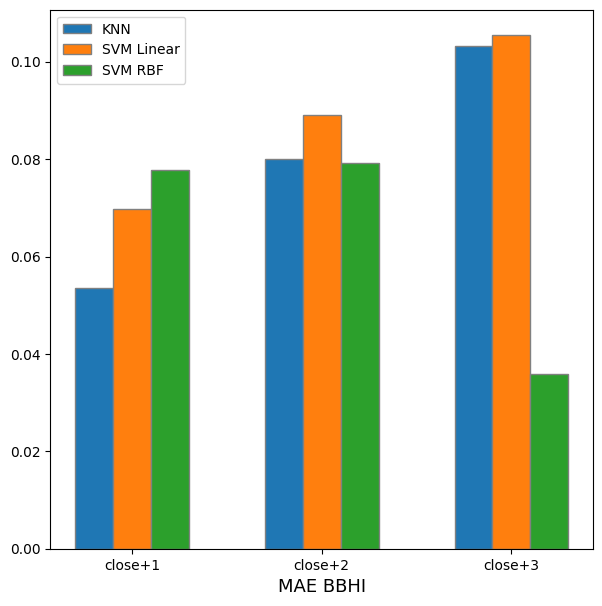

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.20
fig = plt.subplots(figsize =(7,7))

artoMSE = [0.0536, 0.0800, 0.1033]
artoMAE = [0.0698, 0.0890, 0.1054]
bbhiMSE = [0.0777, 0.0791, 0.0359]

br1 = np.arange(len(artoMSE))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

plt.bar(br1, artoMSE, width = barWidth, edgecolor ='grey', label ='KNN')
plt.bar(br2, artoMAE, width = barWidth, edgecolor ='grey', label ='SVM Linear')
plt.bar(br3, bbhiMSE, width = barWidth, edgecolor ='grey', label ='SVM RBF')
# plt.bar(br4, bbhiMAE, width = barWidth, edgecolor ='grey', label ='MAE BBHI')

plt.xlabel('MAE BBHI', fontsize = 13)
# plt.ylabel('Students passed', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(artoMSE))],
        ['close+1', 'close+2', 'close+3'])

plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

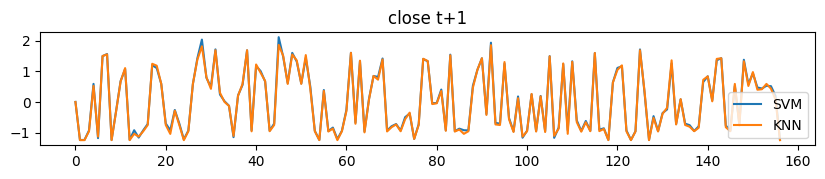

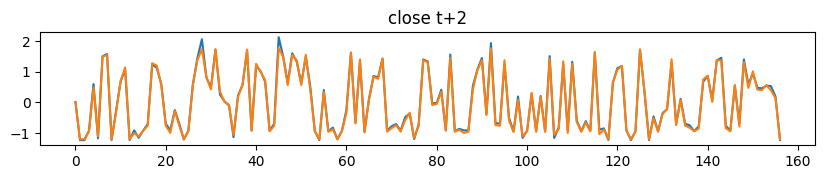

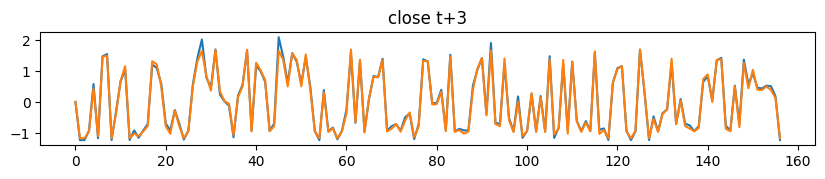

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(3, 1, 1)
plt.plot(y_pred[:,0])
plt.plot(knn_pred[:,0])
plt.title('close t+1')
plt.legend(["SVM", "KNN"])

plt.figure(figsize=(10, 5))
plt.subplot(3, 1, 2)
plt.plot(y_pred[:,1])
plt.plot(knn_pred[:,1])
plt.title('close t+2')

plt.figure(figsize=(10, 5))
plt.subplot(3, 1, 3)
plt.plot(y_pred[:,2])
plt.plot(knn_pred[:,2])
plt.title('close t+3')
plt.show

#Prediksi Data BBHI

In [ ]:
import pandas as pd
df_train = pd.read_csv("/content/BBHI-3.csv")
df_train

,timestamp,open,low,high,close,volume
0,2020-01-01,137,121,137,125,0
1,2020-01-02,125,110,139,117,272100
2,2020-01-03,117,111,125,120,16100
3,2020-01-06,113,113,124,124,201200
4,2020-01-07,120,120,122,121,10400
...,...,...,...,...,...,...
780,2022-12-28,1730,1730,1800,1775,1148200
781,2022-12-29,1780,1760,1790,1785,382400
782,2022-12-30,1785,1765,1840,1765,1549400
783,2023-01-02,1775,1740,1795,1775,413600


In [ ]:
del df_train['timestamp']
del df_train['volume']
df_train

,open,low,high,close
0,137,121,137,125
1,125,110,139,117
2,117,111,125,120
3,113,113,124,124
4,120,120,122,121
...,...,...,...,...
780,1730,1730,1800,1775
781,1780,1760,1790,1785
782,1785,1765,1840,1765
783,1775,1740,1795,1775


In [ ]:
df_train.mean()
#df_train.min()
#df_train.max()
#df_train.std()
#df_train.var()

open     2341.356688
low      2273.448408
high     2431.980892
close    2343.515924
dtype: float64

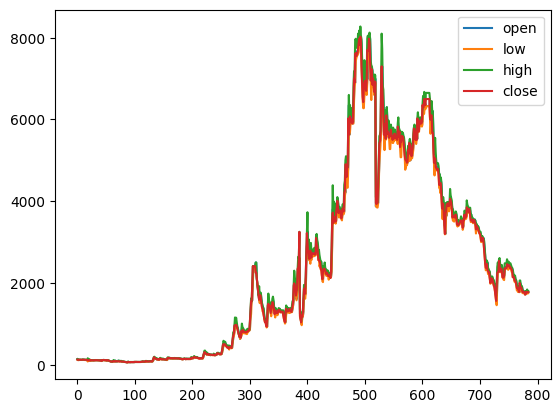

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df_train)
plt.legend(['open', 'low', 'high', 'close'])
#plt.xlim([300,400])
plt.show()

In [ ]:
# Di bawah ini merupakan iterasi untuk memasukan data close ke dalam list
close_price = []
close_temp = []

for i in df_train.index:
  close_price.append(df_train['close'][i])
print(close_price)

In [ ]:
close_temp = close_price
close1 = []
close2 = []
close3 = []
for i in range(3):
  if i == 0:
    close_price = close_temp
    del close_price[0]
    close1.extend(close_price)
  if i == 1:
    close_price = close_temp
    for i in range(1):
      del close_price[0]
    close2.extend(close_price)
  if i == 2:
    close_price = close_temp
    for i in range(2):
      del close_price[0]
      break
    close3.extend(close_price)
print(close1, '\n', close2, '\n', close3)

In [ ]:
close1.extend([1760])
close2.extend([1760, 1685])
close3.extend([1760, 1685, 1695])
print(close1, '\n', close2, '\n', close3)

In [ ]:
df_target = {
    'close+1': close1,
    'close+2': close2,
    'close+3': close3,
}

In [ ]:
df_target = pd.DataFrame(df_target)

In [ ]:
from sklearn.preprocessing import StandardScaler
stdx = StandardScaler()
stdy = StandardScaler()
norm_train = stdx.fit_transform(data)
norm_test = stdy.fit_transform(target)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(norm_train, norm_test, test_size=0.2)

In [ ]:
from sklearn.svm import SVR
svr = SVR()

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
model = MultiOutputRegressor(svr)

In [ ]:
model = model.fit(X_train, Y_train)

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse_1 = mean_squared_error(Y_test[:,0], Y_pred[:,0])
mse_2 = mean_squared_error(Y_test[:,1], Y_pred[:,1])
mse_3 = mean_squared_error(Y_test[:,2], Y_pred[:,2])
print(f'MSE for first regressor: {mse_1} - second regressor: {mse_2} - third regressor: {mse_3}')
print(f'RMSE for first regressor: {(mse_1**0.5)} - second regressor: {(mse_2**0.5)} - third regressor: {(mse_3**0.5)}')
mae_1 = mean_absolute_error(Y_test[:,0], Y_pred[:,0])
mae_2 = mean_absolute_error(Y_test[:,1], Y_pred[:,1])
mae_3 = mean_absolute_error(Y_test[:,2], Y_pred[:,2])
print(f'MAE for first regressor: {mae_1} - second regressor: {mae_2} - third regressor: {mae_3}')

MSE ARTO
> 1st regressor: 0.004560208361791007

> 2nd regressor: 0.009823995451340816

> 3rd regressor: 0.013325429209013149

RMSE ARTO
> 1st regressor: 0.06752931483282655

> 2nd second regressor: 0.09911607060079014

> 3rd third regressor: 0.1154358229017888

MAE ARTO
> 1st regressor: 0.04846783933076036

> 2nd regressor: 0.06538106624611635

> 3rd regressor: 0.08014935439095111

MSE BBHI
> 1st regressor: 0.0056230137972060525

> 2nd regressor: 0.008747369723057712

> 3rd regressor: 0.014341856028809512

RMSE BBHI
> 1st regressor: 0.0749867574789446

> 2nd regressor: 0.09352737419096996

> 3rd regressor: 0.11975748840389695

MAE BBHI
> 1st regressor: 0.05076935087655155

> 2nd regressor: 0.0688715780799785

> 3rd regressor: 0.0837942798353307